In [7]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [8]:
data=pd.read_csv('/kaggle/input/car-price-predictionused-cars/car data.csv')
data.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
47,wagon r,2006,1.05,4.15,65000,Petrol,Dealer,Manual,0
114,Royal Enfield Classic 350,2015,1.15,1.47,17000,Petrol,Individual,Manual,0
62,fortuner,2014,18.75,35.96,78000,Diesel,Dealer,Automatic,0
26,swift,2013,4.15,5.87,55138,Petrol,Dealer,Manual,0
37,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Explore Data

In [11]:
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [12]:
data['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [13]:
data['Year'].sort_values(ascending=True).unique()

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018])

In [14]:
data['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [15]:
data['Selling_type'].value_counts()

Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64

In [16]:
data['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [17]:
data['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [18]:
data[data['Owner'] == 3]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
85,camry,2006,2.5,23.73,142000,Petrol,Individual,Automatic,3


# Missing Values & Dublicates

In [19]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [20]:
data.duplicated().value_counts()

False    299
True       2
Name: count, dtype: int64

In [21]:
data.drop_duplicates(inplace=True)

In [22]:
data.shape

(299, 9)

# Visualize Data

In [23]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [24]:
numerical_df=data[['Year','Selling_Price', 'Present_Price', 'Driven_kms']]

In [25]:
numerical_df.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1])

,Year,Selling_Price,Present_Price,Driven_kms
count,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508
std,2.896868,4.984240,8.566332,39015.170352
min,2003.000000,0.100000,0.320000,500.000000
25%,2012.000000,0.850000,1.200000,15000.000000
50%,2014.000000,3.510000,6.100000,32000.000000
75%,2016.000000,6.000000,9.840000,48883.500000
85%,2016.000000,8.005000,13.600000,58072.600000
90%,2017.000000,9.300000,14.790000,65600.000000
100%,2018.000000,35.000000,92.600000,500000.000000


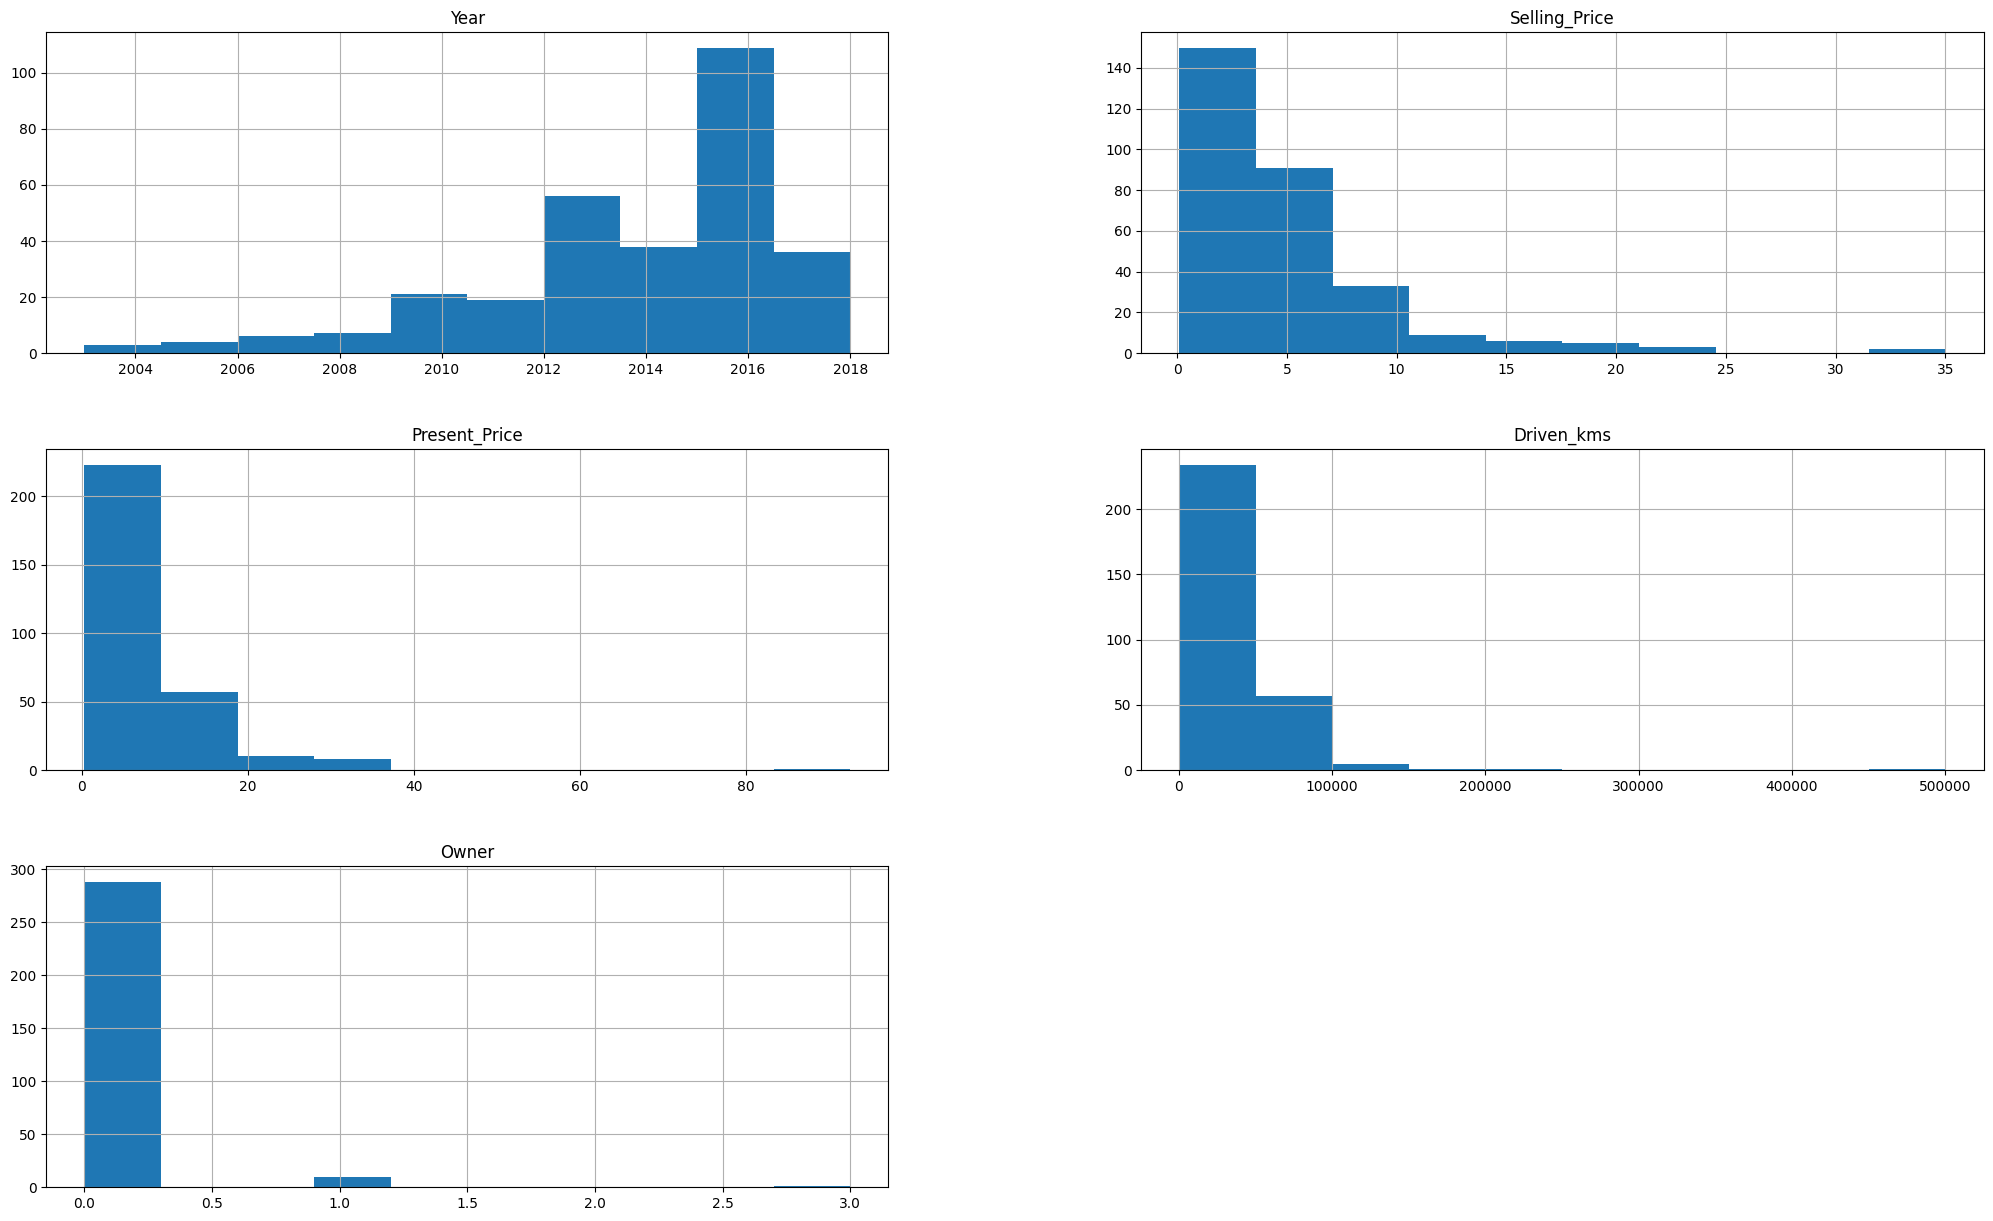

In [26]:
data.hist(figsize=(25,15))
plt.show()

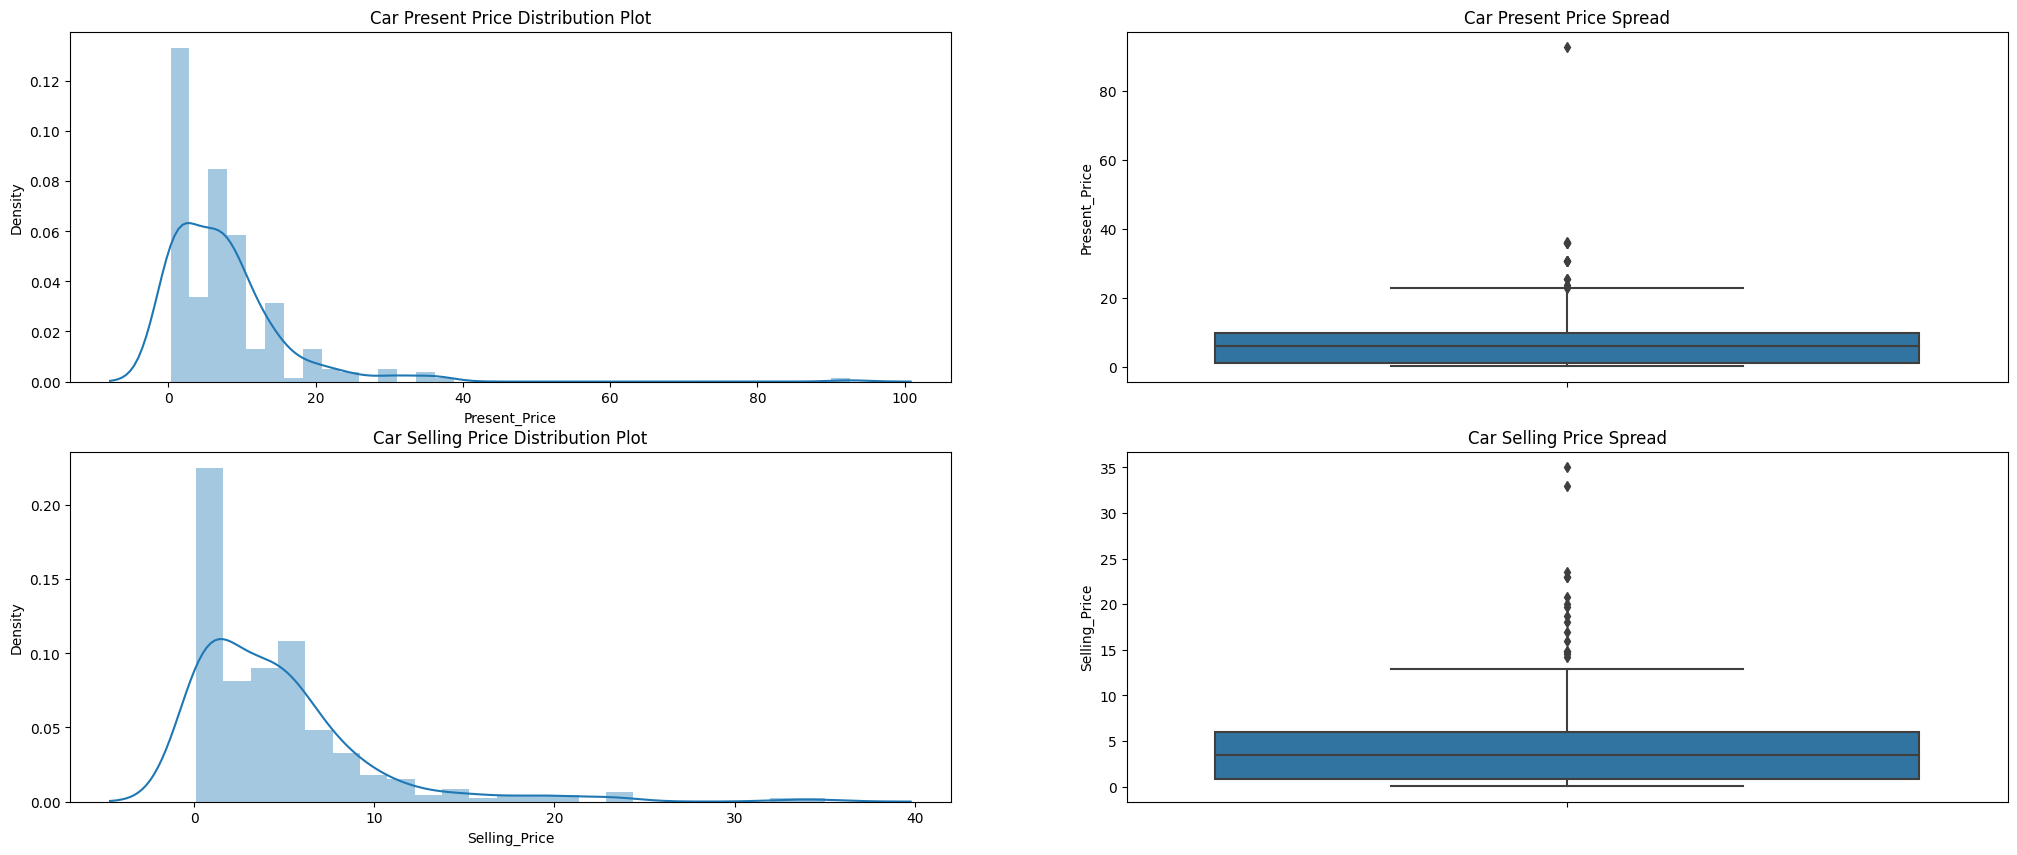

In [27]:
#Prices
plt.figure(figsize=(25,10))

plt.subplot(2,2,1)
plt.title('Car Present Price Distribution Plot')
sns.distplot(data.Present_Price)

plt.subplot(2,2,2)
plt.title('Car Present Price Spread')
sns.boxplot(y=data.Present_Price)

plt.subplot(2,2,3)
plt.title('Car Selling Price Distribution Plot')
sns.distplot(data.Selling_Price)

plt.subplot(2,2,4)
plt.title('Car Selling Price Spread')
sns.boxplot(y=data.Selling_Price)

plt.show()

In [28]:
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


<Figure size 1000x600 with 0 Axes>

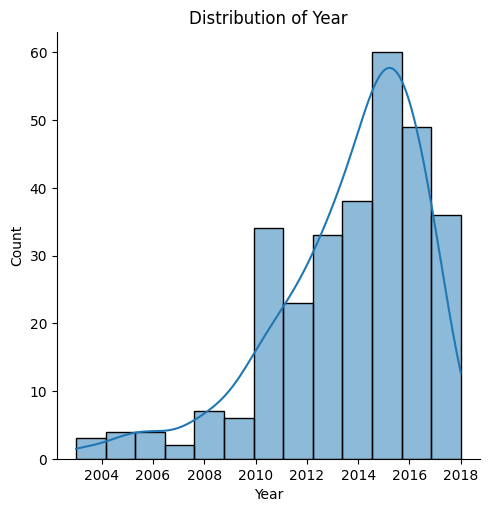

<Figure size 1000x600 with 0 Axes>

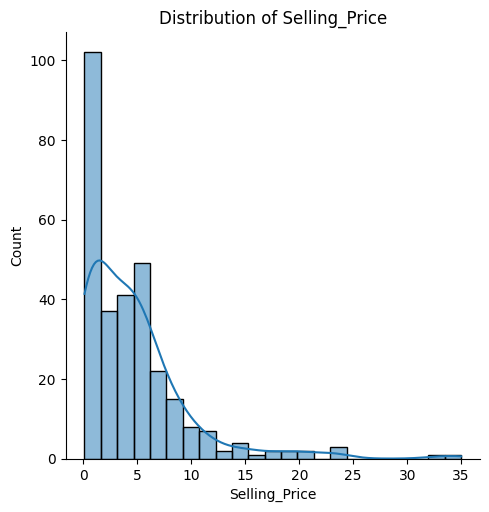

<Figure size 1000x600 with 0 Axes>

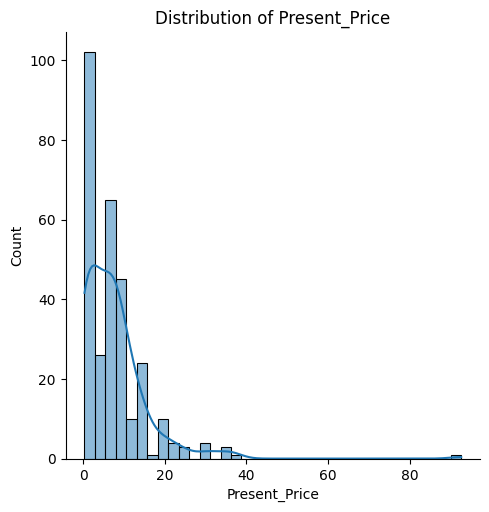

<Figure size 1000x600 with 0 Axes>

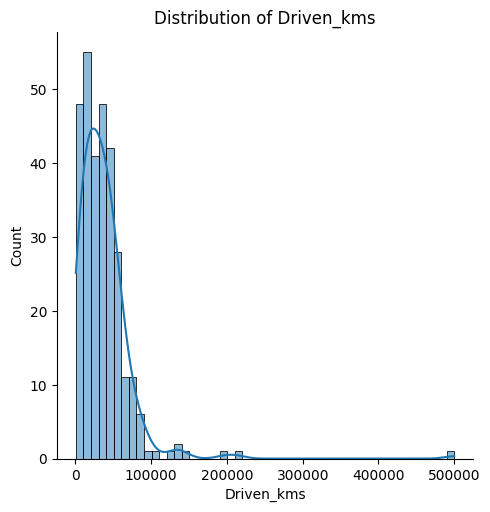

In [29]:
#Visualize Numerical Values
for i in numerical_df.columns:
    plt.figure(figsize=(10,6))
    sns.displot(data=numerical_df,x=i, kde=True)
    plt.title(f'Distribution of {i}')
    plt.show()

In [30]:
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


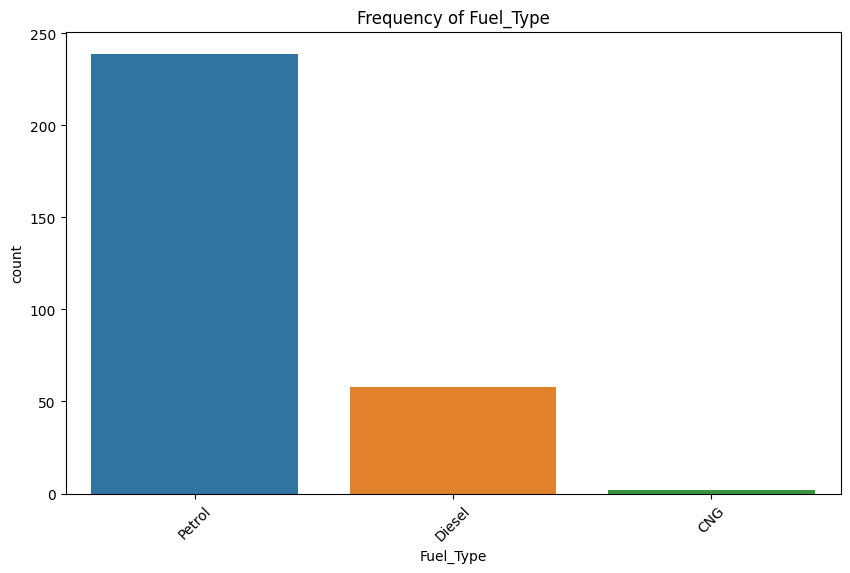

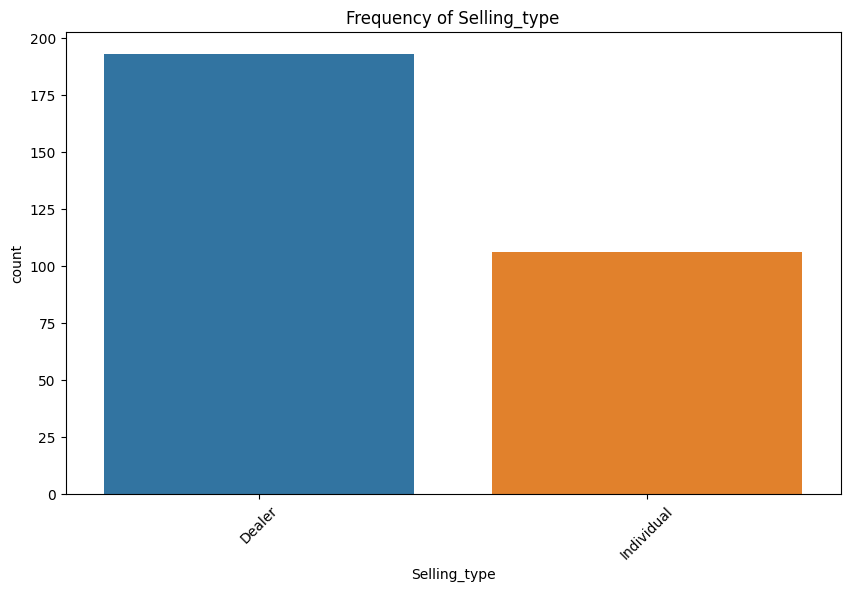

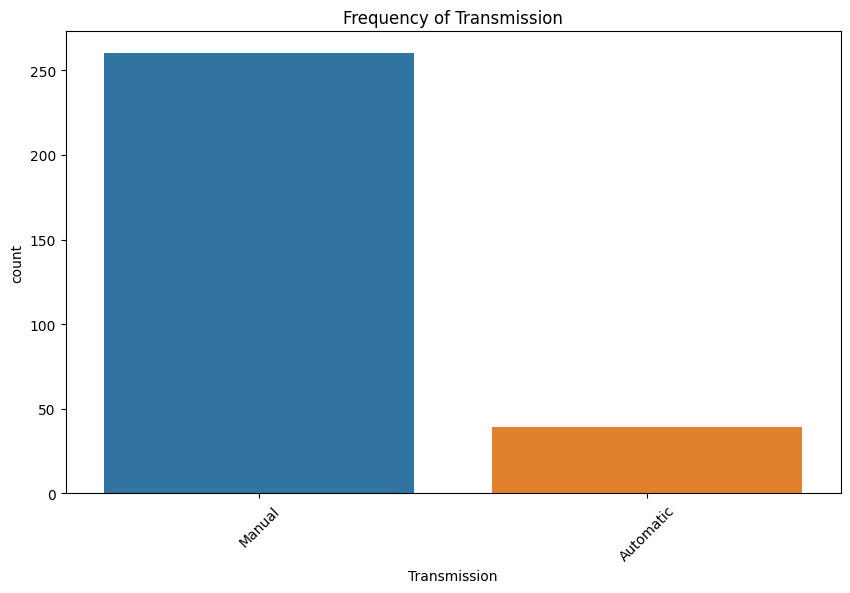

In [31]:
catg_data=data[['Fuel_Type','Selling_type','Transmission']]
for i in catg_data.columns:
    plt.figure(figsize=(10,6))
    sns.countplot(data=catg_data,x=i)
    plt.xticks(rotation=45)
    plt.title(f'Frequency of {i}')
    plt.show()

In [32]:
data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

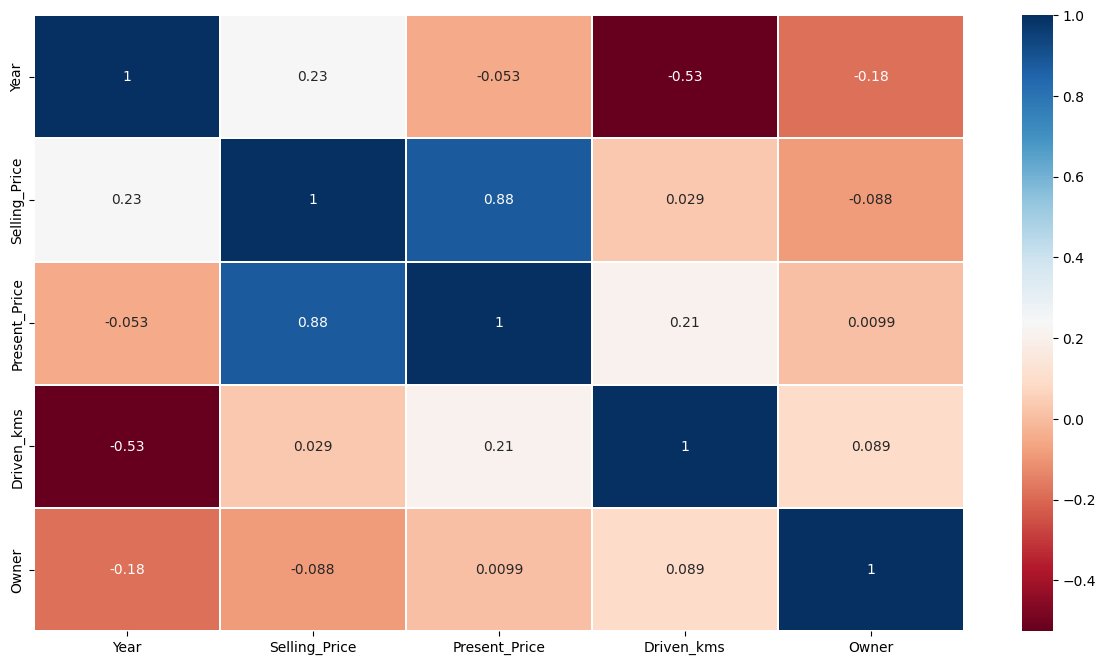

In [33]:
data_corr=data.select_dtypes(include=['int64','float64']).corr()
plt.figure(figsize=(15,8))
sns.heatmap(data_corr,annot=True,cmap='RdBu',linewidths=0.1)
plt.show()

# Encoding 

In [34]:
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [35]:
data.drop('Car_Name',inplace=True,axis=1)

In [36]:
final=pd.get_dummies(data,dtype='int64')

# Build Model

In [37]:
X=final.drop('Selling_Price',axis=1)
y=final['Selling_Price']

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=44,shuffle=True)

# Linear Regression Model

In [39]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()

In [40]:
linear_reg.fit(X_train,y_train)

LinearRegression()

In [41]:
linear_reg.score(X_train,y_train)

0.8795412929630891

In [42]:
linear_reg.score(X_test,y_test)

0.8720764118315891

In [43]:
y_pred_linear=linear_reg.predict(X_test)


In [44]:
print(list(y_pred_linear[:5]))
print(list(y_test[:5]))

[-0.019496475529649615, -1.0247822817087808, 8.018307658611434, 1.5160757878217055, 10.556152967537855]
[2.25, 0.45, 10.11, 0.6, 17.0]


In [45]:
# Calculate Error
from sklearn.metrics import mean_absolute_error,mean_squared_error

MAE=mean_absolute_error(y_test,y_pred_linear,multioutput='uniform_average')

MSE=mean_squared_error(y_test,y_pred_linear,multioutput='uniform_average')

print(f'mean_squared_error: {MSE}')
print(f"mean_absolute_error: {MAE}")

mean_squared_error: 3.5252612820950193
mean_absolute_error: 1.292913508798522


# Decision Tree Model

In [46]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(criterion="squared_error",max_depth=20,min_samples_split=4)

In [47]:
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=20, min_samples_split=4)

In [48]:
tree_reg.score(X_train,y_train)

0.9974871403577739

In [49]:
tree_reg.score(X_test,y_test)

0.9518553471537716

In [50]:
y_pred_tree=tree_reg.predict(X_test)

In [51]:
print(list(y_pred_tree[:5]))
print(list(y_test[:5]))

[2.8, 0.485, 9.344999999999999, 0.49333333333333335, 14.49]
[2.25, 0.45, 10.11, 0.6, 17.0]


In [52]:
# Calculate Error
MAE=mean_absolute_error(y_test,y_pred_tree,multioutput='uniform_average')

MSE=mean_squared_error(y_test,y_pred_tree,multioutput='uniform_average')

print(f'mean_squared_error: {MSE}')
print(f"mean_absolute_error: {MAE}")

mean_squared_error: 1.326748905723906
mean_absolute_error: 0.7143939393939394
